## Importing Necessary Libraries

In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\consu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\consu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing the Mozilla Dataset

In [2]:
df = pd.read_csv('bugs-2023-02-11 mozila core.csv')
df.head()

,Bug ID,Type,Priority,Assignee,Severity,Status,Opened,Closed,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,213,defect,P5,bugz,major,RESOLVED,14-04-1998 14:06,29-08-2017 14:22,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077
1,753,defect,--,joe,normal,RESOLVED,08-09-1998 21:07,21-07-2009 01:56,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969
2,972,defect,P2,dbaron,normal,RESOLVED,01-10-1998 17:07,13-04-2007 21:46,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116
3,1107,defect,P2,peterl-retired,normal,RESOLVED,15-10-1998 19:50,16-01-2015 22:38,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937
4,1118,defect,P2,brendan,normal,RESOLVED,16-10-1998 12:23,02-11-1999 02:24,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382


## Dropping the Un-Necessary Columns¶

In [3]:
df = df.drop(['Opened'], axis = 1)
df = df.drop(['Closed'], axis = 1)
df = df.drop(['Priority'], axis = 1)
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,213,defect,bugz,major,RESOLVED,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077
1,753,defect,joe,normal,RESOLVED,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969
2,972,defect,dbaron,normal,RESOLVED,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116
3,1107,defect,peterl-retired,normal,RESOLVED,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937
4,1118,defect,brendan,normal,RESOLVED,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382


## Getting the information of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bug ID       10000 non-null  int64 
 1   Type         10000 non-null  object
 2   Assignee     10000 non-null  object
 3   Severity     9998 non-null   object
 4   Status       10000 non-null  object
 5   Resolution   10000 non-null  object
 6   Summary      10000 non-null  object
 7   Opened_Date  10000 non-null  object
 8   Closed_Date  10000 non-null  object
 9   Days_Taken   10000 non-null  object
dtypes: int64(1), object(9)
memory usage: 781.4+ KB


## Applying Preprocessing Techniques on Summary Column

In [5]:
df['Summary']

0                  showDocument("javascript:..."); broken
1                       Combined nsImage* & gfxImageFrame
2       [FONT MAC] CSS font-weight: all font weights s...
3       Once text-decoration is set to blink in CSSOM,...
4            Using content-type JS versioning is "sticky"
                              ...                        
9995             working path's problem of FTP connection
9996    [gtk2] Changing GNOME2 theme doesn't apply unt...
9997    M17rc2 Mozilla crashes if I copy a input type=...
9998    remove the magic number 8 (kill ALLOW_SESSION_...
9999          15% Tp regression on redwood (gtk2 Firefox)
Name: Summary, Length: 10000, dtype: object

### 1. Tokenization

In [6]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [7]:
df['Tokenized'] = df.apply(lambda x: tokenize(x['Summary']), axis=1)
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized
0,213,defect,bugz,major,RESOLVED,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077,"[showDocument, javascript, broken]"
1,753,defect,joe,normal,RESOLVED,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969,"[Combined, nsImage, gfxImageFrame]"
2,972,defect,dbaron,normal,RESOLVED,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116,"[FONT, MAC, CSS, all, font, weights, show, as,..."
3,1107,defect,peterl-retired,normal,RESOLVED,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937,"[Once, is, set, to, blink, in, CSSOM, it, impo..."
4,1118,defect,brendan,normal,RESOLVED,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382,"[Using, JS, versioning, is, sticky]"
...,...,...,...,...,...,...,...,...,...,...,...
9995,238847,defect,darin.moz,normal,RESOLVED,FIXED,working path's problem of FTP connection,26-03-2004,15-04-2004,20,"[working, path, problem, of, FTP, connection]"
9996,238854,defect,ginnchen+exoracle,minor,RESOLVED,FIXED,[gtk2] Changing GNOME2 theme doesn't apply unt...,26-03-2004,17-09-2004,175,"[Changing, theme, does, apply, until, restarti..."
9997,238906,defect,nobody,critical,RESOLVED,FIXED,M17rc2 Mozilla crashes if I copy a input type=...,27-03-2004,23-05-2004,57,"[Mozilla, crashes, if, I, copy, a, input, file..."
9998,238931,defect,mconnor,normal,RESOLVED,FIXED,remove the magic number 8 (kill ALLOW_SESSION_...,27-03-2004,07-04-2004,11,"[remove, the, magic, number, kill, const]"


### 2. Converting the Summary into Lowercase

In [8]:
df['String_Tokenized'] = [' '.join(map(str, l)) for l in df['Tokenized']]
df['String_Tokenized'] = df['String_Tokenized'].apply(str.lower)
df['String_Tokenized']

0                          showdocument javascript broken
1                          combined nsimage gfximageframe
2       font mac css all font weights show as either n...
3       once is set to blink in cssom it impossible to...
4                           using js versioning is sticky
                              ...                        
9995               working path problem of ftp connection
9996    changing theme does apply until restarting moz...
9997    mozilla crashes if i copy a input file in conj...
9998                   remove the magic number kill const
9999                     tp regression on redwood firefox
Name: String_Tokenized, Length: 10000, dtype: object

### 3. Removing the Stopwords from the Summary

In [9]:
stop_words = stopwords.words('english')
df['String_Tokenized'] = df['String_Tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['String_Tokenized']

0                          showdocument javascript broken
1                          combined nsimage gfximageframe
2       font mac css font weights show either normal bold
3                         set blink cssom impossible turn
4                              using js versioning sticky
                              ...                        
9995                  working path problem ftp connection
9996              changing theme apply restarting mozilla
9997    mozilla crashes copy input file conjunction li...
9998                       remove magic number kill const
9999                        tp regression redwood firefox
Name: String_Tokenized, Length: 10000, dtype: object

### 4. Removing the Punctuations

In [10]:
df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation
0,213,defect,bugz,major,RESOLVED,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077,"[showDocument, javascript, broken]",showdocument javascript broken,showdocument javascript broken
1,753,defect,joe,normal,RESOLVED,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969,"[Combined, nsImage, gfxImageFrame]",combined nsimage gfximageframe,combined nsimage gfximageframe
2,972,defect,dbaron,normal,RESOLVED,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116,"[FONT, MAC, CSS, all, font, weights, show, as,...",font mac css font weights show either normal bold,font mac css font weights show either normal bold
3,1107,defect,peterl-retired,normal,RESOLVED,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937,"[Once, is, set, to, blink, in, CSSOM, it, impo...",set blink cssom impossible turn,set blink cssom impossible turn
4,1118,defect,brendan,normal,RESOLVED,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382,"[Using, JS, versioning, is, sticky]",using js versioning sticky,using js versioning sticky


### 5. Removing ' " ' with blank space ' '

In [11]:
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].apply(lambda x: x.replace('"', ''))
df['Summary_wo_Punctuation']

0                          showdocument javascript broken
1                          combined nsimage gfximageframe
2       font mac css font weights show either normal bold
3                         set blink cssom impossible turn
4                              using js versioning sticky
                              ...                        
9995                  working path problem ftp connection
9996              changing theme apply restarting mozilla
9997    mozilla crashes copy input file conjunction li...
9998                       remove magic number kill const
9999                        tp regression redwood firefox
Name: Summary_wo_Punctuation, Length: 10000, dtype: object

### 5. Stemming the Summary Column

In [12]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].str.split()
df['Stemmed'] = df['Summary_wo_Punctuation'].apply(lambda x: [stemmer.stem(y) for y in x]) 

### 6. Converting the Stemmed column into string type

In [13]:
df['ListString'] = [' '.join(map(str, l)) for l in df['Stemmed']]
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation,Stemmed,ListString
0,213,defect,bugz,major,RESOLVED,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077,"[showDocument, javascript, broken]",showdocument javascript broken,"[showdocument, javascript, broken]","[showdocu, javascript, broken]",showdocu javascript broken
1,753,defect,joe,normal,RESOLVED,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969,"[Combined, nsImage, gfxImageFrame]",combined nsimage gfximageframe,"[combined, nsimage, gfximageframe]","[combin, nsimag, gfximagefram]",combin nsimag gfximagefram
2,972,defect,dbaron,normal,RESOLVED,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116,"[FONT, MAC, CSS, all, font, weights, show, as,...",font mac css font weights show either normal bold,"[font, mac, css, font, weights, show, either, ...","[font, mac, css, font, weight, show, either, n...",font mac css font weight show either normal bold
3,1107,defect,peterl-retired,normal,RESOLVED,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937,"[Once, is, set, to, blink, in, CSSOM, it, impo...",set blink cssom impossible turn,"[set, blink, cssom, impossible, turn]","[set, blink, cssom, imposs, turn]",set blink cssom imposs turn
4,1118,defect,brendan,normal,RESOLVED,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382,"[Using, JS, versioning, is, sticky]",using js versioning sticky,"[using, js, versioning, sticky]","[use, js, version, sticki]",use js version sticki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,238847,defect,darin.moz,normal,RESOLVED,FIXED,working path's problem of FTP connection,26-03-2004,15-04-2004,20,"[working, path, problem, of, FTP, connection]",working path problem ftp connection,"[working, path, problem, ftp, connection]","[work, path, problem, ftp, connect]",work path problem ftp connect
9996,238854,defect,ginnchen+exoracle,minor,RESOLVED,FIXED,[gtk2] Changing GNOME2 theme doesn't apply unt...,26-03-2004,17-09-2004,175,"[Changing, theme, does, apply, until, restarti...",changing theme apply restarting mozilla,"[changing, theme, apply, restarting, mozilla]","[chang, theme, appli, restart, mozilla]",chang theme appli restart mozilla
9997,238906,defect,nobody,critical,RESOLVED,FIXED,M17rc2 Mozilla crashes if I copy a input type=...,27-03-2004,23-05-2004,57,"[Mozilla, crashes, if, I, copy, a, input, file...",mozilla crashes copy input file conjunction li...,"[mozilla, crashes, copy, input, file, conjunct...","[mozilla, crash, copi, input, file, conjunct, ...",mozilla crash copi input file conjunct linebre...
9998,238931,defect,mconnor,normal,RESOLVED,FIXED,remove the magic number 8 (kill ALLOW_SESSION_...,27-03-2004,07-04-2004,11,"[remove, the, magic, number, kill, const]",remove magic number kill const,"[remove, magic, number, kill, const]","[remov, magic, number, kill, const]",remov magic number kill const


### 7. Applying TF-IDF using SkLearn

In [14]:
data = []
for i in df['ListString']:
    review = ''.join(i) 
    data.append(review)
print(data)

['showdocu javascript broken', 'combin nsimag gfximagefram', 'font mac css font weight show either normal bold', 'set blink cssom imposs turn', 'use js version sticki', 'dot border want round dot instead squar dot', 'string usag inconsist dom xpidl', 'doubl border invis divis space within doubl border', 'treat usemap attribut valu uri data rather cdata idref', 'error handl bug', 'text tabl display two line', 'remov debug robot build', 'work', 'push frame new page push proper', 'nsservicemanag handl differ iid share cid', 'februari night build unabl access netscap webmail', 'rx', 'rx cap', 'rx htmlparser', 'rollov grippi work unless toolbox start top window', 'make string wstring creat const param', 'need way regist instanc servic mgr', 'implement properti', 'nsjscontext call twice', 'code cleanup chang clsid classid', 'pp autoregistr problem mac', 'lack branch callback', 'file descriptor leak registri', 'bdo element implement', 'mlk nscomponentmanagerimpl', 'xpcom need shutdown', 'memb

In [15]:
tfidf = TfidfVectorizer()
 
# get tf-df values
result = tfidf.fit_transform(data)

In [16]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
aa : 9.517293186416572
aaaa : 9.517293186416572
aasb : 9.517293186416572
ab : 7.502390165874306
abaseurl : 9.517293186416572
abc : 9.517293186416572
abend : 9.517293186416572
abi : 9.517293186416572
abil : 7.1659179292530935
abl : 6.77645316249137
ablestr : 9.517293186416572
abnorm : 9.517293186416572
abolut : 9.517293186416572
abort : 8.601002454542416
abr : 9.517293186416572
absolut : 6.036053097080879
absorb : 9.517293186416572
abspo : 9.517293186416572
abstract : 9.111828078308406
absym : 9.517293186416572
abus : 9.111828078308406
acancacheframeoffset : 9.517293186416572
acc : 9.111828078308406
acccess : 9.517293186416572
accdoact : 9.517293186416572
accel : 9.111828078308406
acceler : 8.601002454542416
accent : 8.824146005856626
accepst : 9.517293186416572
accept : 6.77645316249137
acceskey : 9.517293186416572
access : 5.023054561135761
accessibl : 9.517293186416572
accessibli : 9.517293186416572
accesskey : 7.214708093422525
accessor : 8.824146005856626
accessproxi :

In [17]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'showdocu': 4591, 'javascript': 2145, 'broken': 423, 'combin': 679, 'nsimag': 3166, 'gfximagefram': 1651, 'font': 1450, 'mac': 2368, 'css': 850, 'weight': 5395, 'show': 4590, 'either': 1176, 'normal': 2766, 'bold': 386, 'set': 4524, 'blink': 368, 'cssom': 860, 'imposs': 1948, 'turn': 5121, 'use': 5295, 'js': 2159, 'version': 5333, 'sticki': 4780, 'dot': 1108, 'border': 396, 'want': 5372, 'round': 4383, 'instead': 2030, 'squar': 4744, 'string': 4809, 'usag': 5294, 'inconsist': 1966, 'dom': 1088, 'xpidl': 5516, 'doubl': 1109, 'invis': 2083, 'divis': 1057, 'space': 4701, 'within': 5434, 'treat': 5083, 'usemap': 5301, 'attribut': 254, 'valu': 5317, 'uri': 5286, 'data': 900, 'rather': 4149, 'cdata': 524, 'idref': 1888, 'error': 1247, 'handl': 1735, 'bug': 438, 'text': 4960, 'tabl': 4911, 'display': 1045, 'two': 5127, 'line': 2292, 'remov': 4260, 'debug': 921, 'robot': 4366, 'build': 442, 'work': 5444, 'push': 4102, 'frame': 1491, 'new': 2723, 'page': 3762, 'proper': 4065, 'n

In [18]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 423)	0.44014653453908964
  (0, 2145)	0.4173160681627241
  (0, 4591)	0.7950586943027758
  (1, 1651)	0.6092733582552242
  (1, 3166)	0.6363852710293996
  (1, 679)	0.47307479507709854
  (2, 386)	0.36548623140250996
  (2, 2766)	0.3467463949748975
  (2, 1176)	0.38909563315121504
  (2, 4590)	0.2550820978791605
  (2, 5395)	0.4211315951222979
  (2, 850)	0.2438452680408431
  (2, 2368)	0.2534163996450809
  (2, 1450)	0.47821779250262914
  (3, 5121)	0.39350917081598746
  (3, 1948)	0.5018119566320176
  (3, 860)	0.5552714978233724
  (3, 368)	0.45581065238679525
  (3, 4524)	0.27793075673730805
  (4, 4780)	0.7051434262484061
  (4, 5333)	0.5045019455400785
  (4, 2159)	0.4089137224469497
  (4, 5295)	0.28467543441525356
  (5, 4744)	0.2923168857843905
  (5, 2030)	0.19084438294719142
  :	:
  (9996, 4317)	0.5368338741677955
  (9996, 4973)	0.5322158173126699
  (9996, 2619)	0.312059826870635
  (9996, 177)	0.47032088579826314
  (9996, 548)	0.3316212360262965
  (9997, 736)	0.3803986257281830

In [19]:
print('\ntf-idf values in matrix form:')
ab = result.toarray()
print(ab)


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
words_set = tfidf.get_feature_names_out()

print(words_set)

['aa' 'aaaa' 'aasb' ... 'zwj' 'zwnj' 'zwsp']


In [21]:
df_tf_idf = pd.DataFrame(ab, columns = words_set)

df_tf_idf

,aa,aaaa,aasb,ab,abaseurl,abc,abend,abi,abil,abl,...,zlib,zliballoc,zombi,zone,zoom,zope,zparent,zwj,zwnj,zwsp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_tf_idf['Severity'] = df['Severity']

In [23]:
df2 = df_tf_idf.iloc[0:1000,:]

In [24]:
df2 = df2.dropna()

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Columns: 5573 entries, aa to Severity
dtypes: float64(5572), object(1)
memory usage: 42.5+ MB


## GA with KNN

Generation: 1
Best (GA): 0.2094797559224695
Generation: 2
Best (GA): 0.2094797559224695
Generation: 3
Best (GA): 0.20626949030868633
Generation: 4
Best (GA): 0.1996353912419239
Generation: 5
Best (GA): 0.1996353912419239
Generation: 6
Best (GA): 0.19634615936826993
Generation: 7
Best (GA): 0.19634615936826993
Generation: 8
Best (GA): 0.19629231873653985
Generation: 9
Best (GA): 0.19621155778894475
Generation: 10
Best (GA): 0.1929330940416367
Generation: 11
Best (GA): 0.1929330940416367
Generation: 12
Best (GA): 0.1929330940416367
Generation: 13
Best (GA): 0.1896456568557071
Generation: 14
Best (GA): 0.1896456568557071
Generation: 15
Best (GA): 0.1896456568557071
Generation: 16
Best (GA): 0.1896456568557071
Generation: 17
Best (GA): 0.1896456568557071
Generation: 18
Best (GA): 0.1896312993539124
Generation: 19
Best (GA): 0.1896312993539124
Generation: 20
Best (GA): 0.18961335247666905
Accuracy: 81.33333333333333
Feature Size: 2682


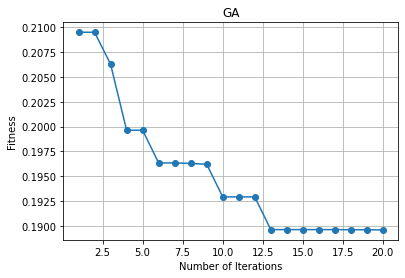

In [26]:
import numpy as np
from numpy.random import rand
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt



# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']
    
    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug   
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def roulette_wheel(prob):
    num = len(prob)
    C   = np.cumsum(prob)
    P   = rand()
    for i in range(num):
        if C[i] > P:
            index = i;
            break
    
    return index


def jfs(xtrain, ytrain, opts):
    # Parameters
    ub       = 1
    lb       = 0
    thres    = 0.5    
    CR       = 0.8     # crossover rate
    MR       = 0.01    # mutation rate
    
    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR'] 
    if 'MR' in opts: 
        MR   = opts['MR']  
 
     # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    X     = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='int')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, X[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (GA):", curve[0,t])
    t += 1
    
    while t < max_iter:
        # Probability
        inv_fit = 1 / (1 + fit)
        prob    = inv_fit / np.sum(inv_fit) 
 
        # Number of crossovers
        Nc = 0
        for i in range(N):
            if rand() < CR:
                Nc += 1
              
        x1 = np.zeros([Nc, dim], dtype='int')
        x2 = np.zeros([Nc, dim], dtype='int')
        for i in range(Nc):
            # Parent selection
            k1      = roulette_wheel(prob)
            k2      = roulette_wheel(prob)
            P1      = X[k1,:].copy()
            P2      = X[k2,:].copy()
            # Random one dimension from 1 to dim
            index   = np.random.randint(low = 1, high = dim-1)
            # Crossover
            x1[i,:] = np.concatenate((P1[0:index] , P2[index:]))
            x2[i,:] = np.concatenate((P2[0:index] , P1[index:]))
            # Mutation
            for d in range(dim):
                if rand() < MR:
                    x1[i,d] = 1 - x1[i,d]
                    
                if rand() < MR:
                    x2[i,d] = 1 - x2[i,d]

        
        # Merge two group into one
        Xnew = np.concatenate((x1 , x2), axis=0)
        
        # Fitness
        Fnew = np.zeros([2 * Nc, 1], dtype='float')
        for i in range(2 * Nc):
            Fnew[i,0] = Fun(xtrain, ytrain, Xnew[i,:], opts)
            if Fnew[i,0] < fitG:
                Xgb[0,:] = Xnew[i,:]
                fitG     = Fnew[i,0]
                   
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (GA):", curve[0,t])
        t += 1
        
        # Elitism 
        XX  = np.concatenate((X , Xnew), axis=0)
        FF  = np.concatenate((fit , Fnew), axis=0)
        # Sort in ascending order
        ind = np.argsort(FF, axis=0)
        for i in range(N):
            X[i,:]   = XX[ind[i,0],:]
            fit[i,0] = FF[ind[i,0]]
       
            
    # Best feature subset
    Gbin       = Xgb[0,:]
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    ga_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return ga_data 



# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(data[:, -1])

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 20   # maximum number of generations
CR   = 0.8
MR   = 0.01
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
GA_acc = "Accuracy:", 100 * Acc
print(*GA_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('GA')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of GA-KNN

In [27]:
from sklearn.metrics import precision_score
GA_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(GA_prec)
from sklearn.metrics import recall_score
GA_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(GA_rec)
from sklearn.metrics import f1_score
GA_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(GA_f1)

Precision: 0.766
Recall: 0.813
F1 Score: 0.751


C:\Users\consu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## PSO with KNN

Iteration: 1
Best (PSO): 0.20290129217516148
Iteration: 2
Best (PSO): 0.1962653984206748
Iteration: 3
Best (PSO): 0.1929833452979181
Iteration: 4
Best (PSO): 0.1894751615218952
Iteration: 5
Best (PSO): 0.1894751615218952
Iteration: 6
Best (PSO): 0.1894751615218952
Iteration: 7
Best (PSO): 0.1894751615218952
Iteration: 8
Best (PSO): 0.1894751615218952
Iteration: 9
Best (PSO): 0.1894751615218952
Iteration: 10
Best (PSO): 0.1894751615218952
Iteration: 11
Best (PSO): 0.18644077530509695
Iteration: 12
Best (PSO): 0.18644077530509695
Iteration: 13
Best (PSO): 0.18644077530509695
Iteration: 14
Best (PSO): 0.18644077530509695
Iteration: 15
Best (PSO): 0.18644077530509695
Iteration: 16
Best (PSO): 0.18644077530509695
Iteration: 17
Best (PSO): 0.18644077530509695
Iteration: 18
Best (PSO): 0.18644077530509695
Iteration: 19
Best (PSO): 0.18644077530509695
Iteration: 20
Best (PSO): 0.18644077530509695
Accuracy: 81.66666666666667
Feature Size: 2753


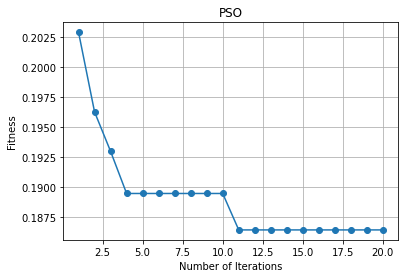

In [28]:
import numpy as np
from numpy.random import rand

# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']
    
    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug   
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data    


import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
import matplotlib.pyplot as plt


# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 20   # maximum number of iterations
w    = 0.9
c1   = 2
c2   = 2
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
PSO_acc = "Accuracy:", 100 * Acc
print(*PSO_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of PSO-KNN

In [29]:
from sklearn.metrics import precision_score
PSO_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(PSO_prec)
from sklearn.metrics import recall_score
PSO_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(PSO_prec)
from sklearn.metrics import f1_score
PSO_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(PSO_f1)

Precision: 0.746
Precision: 0.746
F1 Score: 0.760


C:\Users\consu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Only KNN

In [30]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(xtrain, ytrain)
y_pred_5 = knn5.predict(xtest)
from sklearn.metrics import accuracy_score
KNN_acc = "Accuracy: ", accuracy_score(ytest, y_pred_5)*100
print(*KNN_acc)

Accuracy:  78.66666666666666


## Precision, Recall and F1-Score of Only KNN

In [31]:
from sklearn.metrics import precision_score
KNN_prec = 'Precision: %.3f' % precision_score(ytest, y_pred_5, average='weighted')
print(KNN_prec)
from sklearn.metrics import recall_score
KNN_rec = 'Recall: %.3f' % recall_score(ytest, y_pred_5, average = 'weighted')
print(KNN_rec)
from sklearn.metrics import f1_score
KNN_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred_5, average = 'weighted')
print(KNN_f1)

Precision: 0.730
Recall: 0.787
F1 Score: 0.731


C:\Users\consu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from tabulate import tabulate
mydata = [["KNN", KNN_prec, KNN_rec, KNN_f1, KNN_acc],["PSO-KNN", PSO_prec, PSO_rec, PSO_f1, PSO_acc],["GA-KNN", GA_prec, GA_rec, GA_f1, GA_acc]]
# create header
head = ["Algorithm", "Precision_Score", "Recall_Score", "F1_Score", "Accuracy_Score"]
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------+-------------------+----------------+-----------------+-----------------------------------+
| Algorithm   | Precision_Score   | Recall_Score   | F1_Score        | Accuracy_Score                    |
+=============+===================+================+=================+===================================+
| KNN         | Precision: 0.730  | Recall: 0.787  | F1 Score: 0.731 | ('Accuracy: ', 78.66666666666666) |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
| PSO-KNN     | Precision: 0.746  | Recall: 0.817  | F1 Score: 0.760 | ('Accuracy:', 81.66666666666667)  |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
| GA-KNN      | Precision: 0.766  | Recall: 0.813  | F1 Score: 0.751 | ('Accuracy:', 81.33333333333333)  |
+-------------+-------------------+----------------+-----------------+-----------------------------------+
